In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

fla = pd.read_csv('Florida_2.csv')
# fla.head()

In [3]:
# X used "LoanStatus", "SBAGuarantee",
X = fla[["PctOfGuarantee","DebtCoverage", "Leverage", "PrinBalanceCollected","GrossApproval" ]]
y = fla["SBAGuarantee"]
print(X.shape, y.shape)

(15137, 5) (15137,)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=60)

# X_train.head()

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
round(sum(model.predict(X_test) - y_test), 2)

3112389.25

In [7]:
predict1= model.predict(X_test)

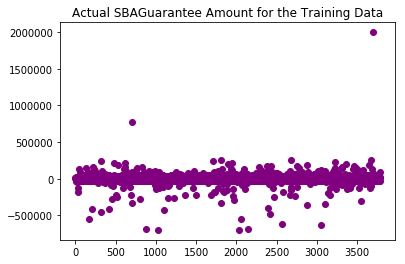

In [8]:
plt.scatter(range(0, len(y_test)), model.predict(X_test) - y_test, c="purple", label="Testing Data")
plt.title("Actual SBAGuarantee Amount for the Training Data")
plt.show()

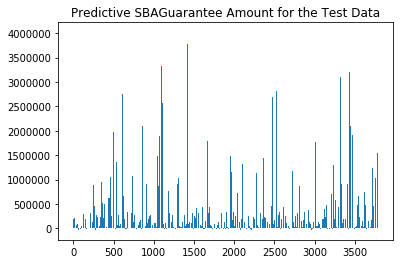

In [9]:
plt.bar(range(0, len(y_test)), predict1,  label="Testing Data")
plt.title("Predictive SBAGuarantee Amount for the Test Data")
plt.show()



In [10]:
linear_score = model.score(X, y)
print(linear_score)

0.990766123142


In [11]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lassomodel = Lasso(alpha=.7)
lassomodel.fit(X_train, y_train)
round(sum(lassomodel.predict(X_test) - y_test), 2)


3112872.3399999999

In [12]:
lasso_score = lassomodel.score(X, y)
lasso_score

0.99076612889180715

In [13]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

ridgemodel = Ridge(alpha=.7)
ridgemodel.fit(X_train, y_train)
round(sum(ridgemodel.predict(X_test) - y_test), 2)


3117015.98

In [14]:
ridge_score = ridgemodel.score(X, y)
ridge_score

0.99076605167578402

In [15]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticmodel = ElasticNet(alpha=.7)
elasticmodel.fit(X_train, y_train)
round(sum(elasticmodel.predict(X_test) - y_test), 2)


4629767.2999999998

In [16]:
elastic_score = elasticmodel.score(X, y)
elastic_score

0.98953156882303384

In [17]:
fla_df2 = fla.corr()

In [18]:
fla_df2.to_excel("Correlation.xls")